In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output


In [8]:
maze_graph = nx.grid_2d_graph(5, 5)
walls = [((0, 1), (0, 2)), ((1, 1), (2, 1)), ((2, 3), (3, 3)), ((3, 0), (4, 0))]

maze_graph.remove_edges_from(walls)

pos = {(x, y): (x, -y) for x, y in maze_graph.nodes()}
start_node = (0, 0)
goal_node = (4, 4)


In [9]:
def draw_maze(agent_position):
    plt.figure(figsize=(8, 8))
    
    nx.draw_networkx_nodes(maze_graph, pos, node_size=700, node_color="lightblue")
    
    nx.draw_networkx_nodes(maze_graph, pos, nodelist=[start_node], node_size=700, node_color="green", label="Start")
    nx.draw_networkx_nodes(maze_graph, pos, nodelist=[goal_node], node_size=700, node_color="red", label="Goal")
    
    nx.draw_networkx_nodes(maze_graph, pos, nodelist=[agent_position], node_size=700, node_color="orange", label="Agent")
    
    nx.draw_networkx_edges(maze_graph, pos, width=2)
    
    nx.draw_networkx_labels(maze_graph, pos, font_size=12, font_color="black")
    
    plt.legend(["Start", "Goal", "Agent"], loc="upper left")
    
    plt.title("Labyrinthe", fontsize=15)
    plt.axis("off")
    plt.show()


In [10]:
def move_agent(agent_position, direction):
    x, y = agent_position
    if direction == "up" and (x, y-1) in maze_graph:
        return (x, y-1)
    elif direction == "down" and (x, y+1) in maze_graph:
        return (x, y+1)
    elif direction == "left" and (x-1, y) in maze_graph:
        return (x-1, y)
    elif direction == "right" and (x+1, y) in maze_graph:
        return (x+1, y)
    return agent_position 


In [11]:
def find_path(start, goal):
    queue = [(start, [start])]
    visited = set()
    
    while queue:
        (node, path) = queue.pop(0)
        if node in visited:
            continue
        visited.add(node)
        
        for neighbor in maze_graph.neighbors(node):
            if neighbor == goal:
                return path + [neighbor]
            else:
                queue.append((neighbor, path + [neighbor]))
    return []


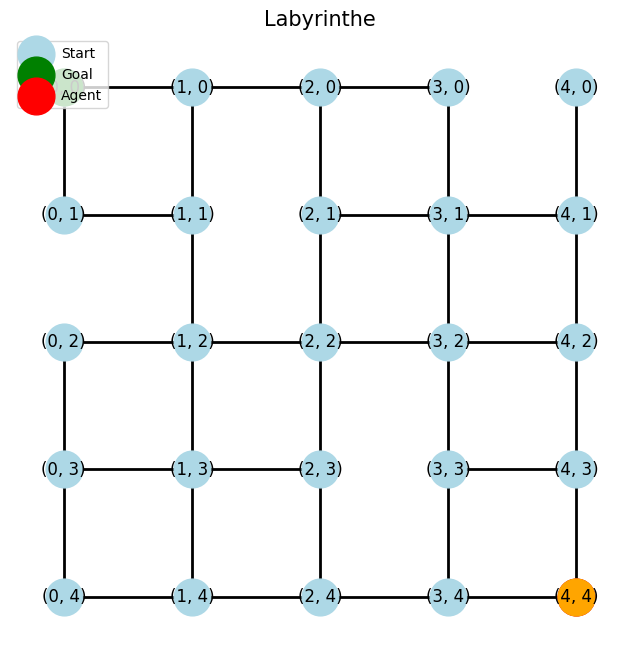

In [12]:
path = find_path(start_node, goal_node)

for step in path:
    clear_output(wait=True) 
    draw_maze(step)          
    time.sleep(1)           
